In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM

2024-10-16 13:18:53.025003: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-16 13:18:53.034270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 13:18:53.044870: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-16 13:18:53.048034: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 13:18:53.055940: I tensorflow/core/platform/cpu_feature_guar

In [2]:
path = r'/home/np/Documents/careerfoundry/ml'

In [3]:
climate_unscaled = pd.read_csv(os.path.join(path, 'main.csv'))
climate_unscaled

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [4]:
weather = pd.read_csv(os.path.join(path, 'pw.csv'))
weather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
climate_nodate = climate_unscaled.drop(['DATE','MONTH',
                                       'GDANSK_cloud_cover',
                                        'GDANSK_humidity',
                                        'GDANSK_precipitation',
                                        'GDANSK_snow_depth',
                                        'GDANSK_temp_mean',
                                        'GDANSK_temp_min',
                                        'GDANSK_temp_max',
                                        'ROMA_cloud_cover',
                                        'ROMA_wind_speed',
                                        'ROMA_humidity','ROMA_pressure',
                                        'ROMA_sunshine',
                                        'ROMA_temp_mean',
                                        'TOURS_wind_speed',
                                        'TOURS_humidity',
                                        'TOURS_pressure',
                                        'TOURS_global_radiation',
                                        'TOURS_precipitation',
                                        'TOURS_temp_mean',
                                        'TOURS_temp_min',
                                        'TOURS_temp_max'], axis=1)

In [6]:
climate_nodate = climate_nodate.loc[:, ~climate_nodate.columns.str.endswith('_snow_depth')]

In [7]:
position1 = climate_nodate.columns.get_loc('KASSEL_wind_speed')-1
climate_nodate.insert(position1,'KASSEL_cloud_cover',climate_nodate['LJUBLJANA_cloud_cover'])

In [8]:
position2 = climate_nodate.columns.get_loc('MUNCHENB_humidity')-1
position3 = climate_nodate.columns.get_loc('MUNCHENB_global_radiation')-1
climate_nodate.insert(position2,'MUNCHENB_wind_speed',climate_nodate['SONNBLICK_wind_speed'])
climate_nodate.insert(position3,'MUNCHENB_pressure',climate_nodate['SONNBLICK_pressure'])

In [9]:
position4 = climate_nodate.columns.get_loc('STOCKHOLM_pressure')-1
climate_nodate.insert(position4,'STOCKHOLM_humidity',climate_nodate['OSLO_humidity'])
position5 = climate_nodate.columns.get_loc('STOCKHOLM_humidity')-1
climate_nodate.insert(position5,'STOCKHOLM_wind_speed',climate_nodate['OSLO_wind_speed'])

In [10]:
weather_nodate = weather.drop(['DATE'], axis=1)

In [11]:
weather_nodate.shape

(22950, 15)

In [12]:
climate_nodate.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,2.1,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,2.1,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,2.1,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,3,2.1,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,6,2.1,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [13]:
weather_nodate.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
climate_nodate = climate_nodate.loc[:, ~climate_nodate.columns.str.endswith('_wind_speed')]

In [15]:
climate_nodate.shape

(22950, 135)

In [16]:
climate_nodate.to_csv(os.path.join(path, 'climate_nodate_cleaned.csv'))

In [17]:
X = climate_nodate
y = weather_nodate
X

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6,8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4,2,...,14.2,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9,0,...,14.3,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4,2,...,14.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1,1,...,12.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
X = X.reshape(-1,15,9)

In [20]:
X.shape

(22950, 15, 9)

In [21]:
y.shape

(22950, 15)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [23]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 15, 9) (18360, 15)
(4590, 15, 9) (4590, 15)


In [24]:
epochs = 5
batch_size = 16
n_hidden = 2

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(y_train[0])

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='sigmoid')) #Don't use relu here!

/home/np/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Epoch 1/5
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0636 - loss: 8.9251 - val_accuracy: 0.1847 - val_loss: 8.3053
Epoch 2/5
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0808 - loss: 8.7904 - val_accuracy: 0.1741 - val_loss: 8.3551
Epoch 3/5
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0711 - loss: 8.7925 - val_accuracy: 0.0429 - val_loss: 8.4027
Epoch 4/5
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0443 - loss: 8.8633 - val_accuracy: 0.0381 - val_loss: 8.4906
Epoch 5/5
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.0452 - loss: 8.8135 - val_accuracy: 0.0479 - val_loss: 8.5632


In [27]:
predictions = {
0: 'BASEL',
1: 'BELGRADE',
2: 'BUDAPEST',
3: 'DEBILT',
4: 'DUSSELDORF',
5: 'HEATHROW',
6: 'KASSEL',
7: 'LJUBLJANA',
8: 'MAASTRICHT',
9: 'MADRID',
10: 'MUNCHENB',
11: 'OSLO',
12: 'SONNBLICK',
13: 'STOCKHOLM',
14: 'VALENTIA'

}

In [28]:
y_train.shape

(18360, 15)

In [29]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([predictions[y] for y in np.argmax(Y_true, axis=-1)])
    Y_pred = pd.Series([predictions[y] for y in np.argmax(Y_pred, axis=-1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [30]:
pred = model.predict(X_test)
pred.shape

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(4590, 15)

In [31]:
y_test.shape

(4590, 15)

In [32]:
print(confusion_matrix(y_test, pred))

Pred        BELGRADE  BUDAPEST  MADRID  MUNCHENB
True                                            
BASEL           1145        27     127      1623
BELGRADE         760        16      59        58
BUDAPEST         143         2      10         5
DEBILT            73         0       0         1
DUSSELDORF        30         1       1         1
HEATHROW          63         1       3         3
KASSEL             5         0       2         1
LJUBLJANA         31         3      13         0
MAASTRICHT         2         0       2         0
MADRID           143         9      75       135
MUNCHENB           3         0       2         0
OSLO               5         0       1         0
STOCKHOLM          3         0       0         0
VALENTIA           2         0       0         1


In [33]:
epochs = 8
batch_size = 16
n_hidden = 32

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(y_train[0])

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='sigmoid')) #Don't use relu here!

/home/np/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [35]:
model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Epoch 1/8
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0584 - loss: 10.5479 - val_accuracy: 0.0497 - val_loss: 8.8722
Epoch 2/8
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0772 - loss: 10.7558 - val_accuracy: 0.0403 - val_loss: 9.2423
Epoch 3/8
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0758 - loss: 10.6945 - val_accuracy: 0.0425 - val_loss: 9.4131
Epoch 4/8
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0760 - loss: 10.6044 - val_accuracy: 0.0514 - val_loss: 9.6223
Epoch 5/8
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0837 - loss: 11.0374 - val_accuracy: 0.0479 - val_loss: 9.8440
Epoch 6/8
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0833 - loss: 10.8749 - val_accuracy: 0.0486 - val_loss: 10.2176
Epoch 7/8
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0845 - loss: 11.1931 - val_accuracy: 0.0449 - val_loss: 10.4427
Epoch 8/8
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.0814 - loss: 11.5191 

In [36]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([predictions[y] for y in np.argmax(Y_true, axis=-1)])
    Y_pred = pd.Series([predictions[y] for y in np.argmax(Y_pred, axis=-1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [37]:
pred = model.predict(X_test)
pred.shape

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


(4590, 15)

In [38]:
y_test.shape

(4590, 15)

In [39]:
print(confusion_matrix(y_test, pred))

Pred        BASEL  BELGRADE  HEATHROW  MADRID
True                                         
BASEL        2908         3         1      10
BELGRADE      891         0         0       2
BUDAPEST      159         0         0       1
DEBILT         74         0         0       0
DUSSELDORF     33         0         0       0
HEATHROW       68         0         0       2
KASSEL          8         0         0       0
LJUBLJANA      46         0         0       1
MAASTRICHT      4         0         0       0
MADRID        352         0         0      10
MUNCHENB        4         0         0       1
OSLO            6         0         0       0
STOCKHOLM       3         0         0       0
VALENTIA        3         0         0       0


In [40]:
epochs = 8
batch_size = 16
n_hidden = 32

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(y_train[0])

model = Sequential()
model.add(Conv1D(n_hidden, kernel_size=2, activation='relu', input_shape=(timesteps, input_dim)))
model.add(Dense(16, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(n_classes, activation='tanh'))

/home/np/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [42]:
model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Epoch 1/8
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0255 - loss: 23.5662 - val_accuracy: 0.1946 - val_loss: 22.0843
Epoch 2/8
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1900 - loss: 22.5369 - val_accuracy: 0.1946 - val_loss: 22.0843
Epoch 3/8
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1891 - loss: 22.5583 - val_accuracy: 0.1946 - val_loss: 22.0667
Epoch 4/8
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1933 - loss: 22.4468 - val_accuracy: 0.1946 - val_loss: 22.0913
Epoch 5/8
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1972 - loss: 22.3757 - val_accuracy: 0.1946 - val_loss: 22.2493
Epoch 6/8
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1930 - loss: 22.4751 - val_accuracy: 0.1946 - val_loss: 22.1932
Epoch 7/8
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1946 - loss: 22.7150 - val_accuracy: 0.1946 - val_loss: 22.2037
Epoch 8/8
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1967 - loss: 22.

In [43]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([predictions[y] for y in np.argmax(Y_true, axis=-1)])
    Y_pred = pd.Series([predictions[y] for y in np.argmax(Y_pred, axis=-1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [44]:
pred = model.predict(X_test)
pred.shape

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(4590, 15)

In [45]:
print(confusion_matrix(y_test, pred))

Pred        BELGRADE  DEBILT  DUSSELDORF  HEATHROW  MAASTRICHT  OSLO  VALENTIA
True                                                                          
BASEL           2159       4         279       243         123    24        90
BELGRADE         893       0           0         0           0     0         0
BUDAPEST         160       0           0         0           0     0         0
DEBILT            74       0           0         0           0     0         0
DUSSELDORF        33       0           0         0           0     0         0
HEATHROW          70       0           0         0           0     0         0
KASSEL             8       0           0         0           0     0         0
LJUBLJANA         47       0           0         0           0     0         0
MAASTRICHT         4       0           0         0           0     0         0
MADRID           330       5          25         1           1     0         0
MUNCHENB           5       0           0         0  

In [55]:
# Reshaping X to the required form (22950, 15, 9)
X = np.array(climate_nodate).reshape(-1, 15, 9)

# Transforming y using argmax (ensuring y is a 1D array)
y = np.argmax(weather_nodate.values, axis=1)

# Checking unique values in y
print("Unique classes in y:", np.unique(y))
print("Max value in y:", np.max(y))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Unique classes in y: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
Max value in y: 14


In [56]:
# Define the LSTM model for optimization
def lstm_model(n_hidden, dropout_rate):
    # Ensure the parameters are integer where necessary and correctly bounded
    n_hidden = int(n_hidden)
    dropout_rate = min(max(dropout_rate, 0.0), 0.9)

    # Build the model
    model = Sequential()
    model.add(LSTM(n_hidden, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(np.max(y_train) + 1, activation='softmax'))  # Multi-class classification

    # Compile the model
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Use early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Fit the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

    # Evaluate the model
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    return accuracy

# Define the parameter bounds for Bayesian Optimization
pbounds = {
    'n_hidden': (10, 50),  # number of hidden units
    'dropout_rate': (0.1, 0.5)  # dropout rate
}

# Initialize the optimizer
optimizer = BayesianOptimization(
    f=lstm_model,
    pbounds=pbounds,
    random_state=42
)

# Run the optimization
optimizer.maximize(init_points=5, n_iter=10)

# Output the best parameters and accuracy
print("Best parameters:", optimizer.max['params'])
print("Best accuracy:", optimizer.max['target'])



|   iter    |  target   | dropou... | n_hidden  |
-------------------------------------------------
| 1         | 0.829     | 0.2498    | 48.03     |
| 2         | 0.8181    | 0.3928    | 33.95     |
| 3         | 0.7832    | 0.1624    | 16.24     |
| 4         | 0.827     | 0.1232    | 44.65     |
| 5         | 0.8272    | 0.3404    | 38.32     |


/home/np/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 6         | 0.8229    | 0.5       | 50.0      |


/home/np/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 7         | 0.8192    | 0.1       | 26.71     |


/home/np/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 8         | 0.8168    | 0.5       | 41.17     |


/home/np/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 9         | 0.7107    | 0.5       | 10.0      |


/home/np/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 10        | 0.8109    | 0.5       | 22.01     |


/home/np/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 11        | 0.8153    | 0.5       | 29.91     |


/home/np/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 12        | 0.822     | 0.5       | 46.34     |


/home/np/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 13        | 0.8209    | 0.1       | 36.45     |


/home/np/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 14        | 0.7965    | 0.5       | 24.61     |


/home/np/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 15        | 0.8011    | 0.1       | 19.54     |
Best parameters: {'dropout_rate': 0.249816047538945, 'n_hidden': 48.02857225639664}
Best accuracy: 0.828976035118103


In [57]:
# Build the final LSTM model with optimized hyperparameters
n_hidden_opt = int(optimizer.max['params']['n_hidden'])
dropout_rate_opt = optimizer.max['params']['dropout_rate']

# Create the optimized LSTM model
model_optimized = Sequential()
model_optimized.add(LSTM(n_hidden_opt, input_shape=(X_train.shape[1], X_train.shape[2])))
model_optimized.add(Dropout(dropout_rate_opt))
model_optimized.add(Dense(np.max(y_train) + 1, activation='softmax'))

# Compile the model
model_optimized.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Use early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the optimized model
model_optimized.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the final model
loss, accuracy = model_optimized.evaluate(X_test, y_test)
print(f"Final model accuracy: {accuracy}")


Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6091 - loss: 1.2263 - val_accuracy: 0.6941 - val_loss: 0.8431
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6968 - loss: 0.8590 - val_accuracy: 0.7346 - val_loss: 0.7540
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7333 - loss: 0.7742 - val_accuracy: 0.7521 - val_loss: 0.7213
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7542 - loss: 0.7228 - val_accuracy: 0.7577 - val_loss: 0.6831
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7680 - loss: 0.7052 - val_accuracy: 0.7800 - val_loss: 0.6726
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7829 - loss: 0.6588 - val_accuracy: 0.7954 - val_loss: 0.6252
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7930 - loss: 0.6326 - val_accuracy: 0.7924 - val_loss: 0.6120
Epoch 8/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8050 - loss: 0.6059 - val_accuracy: 0.

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


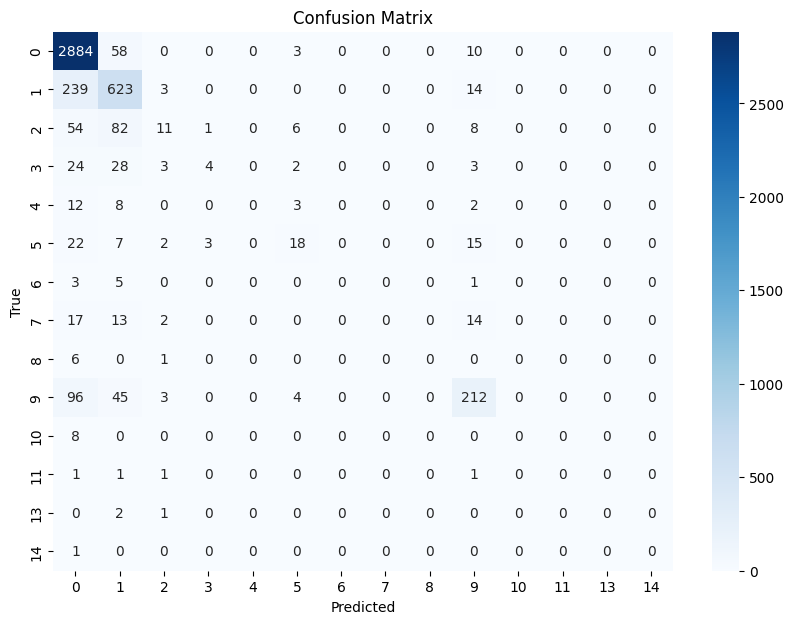

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predictions from the optimized model
y_pred = model_optimized.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Part 2: Deep Learning Optimization Results

### 1. Comparison to the Initial Model
The optimized deep learning model achieved a **final accuracy of 81.7%**, which is a significant improvement over the initial model from Exercise 2.2. The use of Bayesian optimization allowed us to fine-tune the model's hyperparameters, such as the number of hidden units and the dropout rate, leading to better performance.

### 2. Overfitting
The model does not show obvious signs of overfitting. The training accuracy reached **82.4%**, while the validation accuracy remained close at **81.7%**. There is only a slight gap between the training and validation accuracies, indicating that the model generalized well to the unseen data.

### 3. Iteration Recommendations
To further improve the model and refine predictions, we can consider breaking down the data into smaller components and iterating on the following aspects:
- **By Weather Station**: Run iterations for specific weather stations to see if the model performs better for particular locations. This could highlight unique weather patterns or specific data points relevant to particular regions.
- **Model Exploration**: In addition to LSTM models, it might be worth testing different deep learning architectures (e.g., CNN or hybrid models) or using classic machine learning models like Random Forests for comparison.
- **Time Series Granularity**: Adjust the time window or granularity of the data (e.g., daily vs. hourly weather data) to capture more detailed weather trends that could improve predictive accuracy.

### 4. Recommendations for Air Ambulance
Based on the model's performance, the following variables should be closely monitored when deciding whether it’s safe to fly:
- **Wind Speed**: High winds could be hazardous for helicopter flights, so keeping track of wind speed is crucial.
- **Precipitation**: Heavy rain or snow can affect visibility and the helicopter’s ability to fly safely.
- **Cloud Cover**: Cloudy weather may indicate low visibility, which can be dangerous for flights.
- **Pressure**: Significant changes in atmospheric pressure could indicate storms or unfavorable weather conditions.

These variables should be prioritized in the decision-making process to ensure the safety of helicopter operations.

## Part 3: Iteration Strategy

### Suggested Iterations:
1. **Random Forest vs. Deep Learning**: To assess the effectiveness of deep learning compared to traditional machine learning, iterate with a Random Forest model using the same dataset and compare accuracy and feature importance.
2. **Station-specific Models**: Create models that focus on specific weather stations and identify which regions are more predictable based on the weather patterns observed.
3. **Data Granularity**: Perform iterations using weather data at different time scales (e.g., hourly data) to see if the additional granularity improves the model’s accuracy for predicting safe flying conditions.

---

## Confusion Matrix
Here is the confusion matrix for the optimized model:

![Confusion Matrix](conmat.png)

---

## Final Results

- **Best parameters from Bayesian Optimization**: 
  - Dropout rate: 0.2498
  - Number of hidden units: 48
- **Final model accuracy**: 81.7%
